In [29]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy import stats

dataAnggur = pd.read_csv('../data/anggur.csv')

Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test
yang dikaitkan dengan histogram plot

## Asumsi
Pada tes normalitas yang dilakukan pada Tugas Besar II ini, berlaku asumsi sebagai berikut:
- Suatu distibusi dapat dikatakan *positively skewed* apabila memiliki nilai *skewness* lebih besar dari 0.5
- Suatu distibusi dapat dikatakan *negatively skewed* apabila memiliki nilai *skewness* lebih besar dari -0.5
- Suatu distibusi dapat dikatakan simetris apabila memiliki nilai *skewness* diantara -0.5 sampai 0.5
- Jika nilai modus = median = mean maka nilai *skewness* adalah nol
- Jika nilai modus < median < mean maka distribusi dapat dikatakan *positively skewed* 
- Jika nilai modus > median > mean maka distribusi dapat dikatakan *negatively skewed* 

## Metode Pengetesan Normalitas
Secara umum, pengetesan normalitas dibagi menjadi dua cara, yaitu sebagai berikut.
- Pengetesan melalui grafik. Pengetesan dilakukan dengan membandingkan grafik (histogram, QQ plot, dll.) dengan grafik yang bersesuaian dari sampel data yang berdistribusi normal. Pendekatan ini bersifat informal.
- Pengetesan statistik. Pengetesan ini dilakukan dengan uji hipotesis. Contoh pengetesan normalitas secara statistik adalah Shapiro-Wilk test, Kolmogorov-Smirnov test, dan Jarque-Bera test. Pengetesan ini bersifat formal.
<br>

Pada bagian ini, pengetesan normalitas yang digunakan yaitu pengetesan melalui histogram, yang akan dikaitkan dengan statistik-statistik tertentu seperti *skewness*, *excess kurtosis*, mean, median, dan modus. Lalu, hasil pengetesan tersebut dibandingkan dengan hasil pengetesan normalitas statistik, yaitu D'Agostino-Pearson Test dan Shapiro-Wilk Test.
<br><br>
Berikut adalah penjelasan mengenai pengetesan yang digunakan.

### 1. Pengetesan melalui Histogram
Secara teoretis, data yang berdistribusi normal memiliki histogram dengan ciri sebagai berikut.
- Histogram berbentuk bell-shaped yang simetris.
- Histogram berbentuk simetris terhadap sumbu tegak x = mean.
- Kurva mendekati sumbu datar secara asimtotik ke kiri dan kanan.
- Skewness bernilai 0, yang menandakan distribusi simetris.
- Kurtosis bernilai 3 (excess kurtosis bernilai 0).
<br>

Pada pengetesan yang dilakukan, histogram setiap kolom divisualisasikan dan dibandingkan dengan ciri histogram di atas. Namun, untuk perhitungan skewness dan kurtosis, diberikan toleransi sebesar 0.5, seperti asumsi yang dituliskan di atas. 

### 2. D'Agostino-Pearson Test
D'Agostino-Pearson Test adalah tes normalitas yang perhitungannya menggabungkan hasil tes skewness dan kurtosis D'Agostino. Tes ini kurang sensitif terhadap penyimpangan (deviasi) dari distribusi normal di ekor distribusi.
$$
K^2 = Z_s^2 + Z_k^2
$$
$Z_s^2$ adalah z-score dari tes skewness D'Agostino dan $Z_k^2$ adalah z-score dari tes kurtosis D'Agostino. Jika hipotesis null terbukti, $K^2$ diaproksimasi terdistribusi chi-squared dengan derajat kebebasan 2.
<br><br>
Berikut adalah mekanisme pengujian hipotesis pada D'Agostino-Pearson Test.
- H0 : Data berdistribusi normal
- H1 : Data tidak berdistribusi normal
- Nilai Alpha : 0.05
- Tes Statistik : (insert gambar rumus tes statistik)
- Penarikan Kesimpulan : Jika Nilai P > alpha, maka H0 *fail to reject*, artinya data berdistribusi normal. Sebaliknya, jika Nilai P <= alpha, maka H0 *rejected*, artinya data tidak berdistribusi normal.

### 3. Shapiro-Wilk Test
Shapiro-Wilk Test adalah tes normalitas yang perhitungannya didasari oleh perbandingan antara data yang diobservasi dan *expected normal distribution* dari data tersebut. Tes ini tidak terlalu *reliable* untuk jumlah sampel yang kecil. Namun, sampel yang ada pada tiap kolom sudah cukup besar, yaitu sebanyak 1000 sampel.<br><br>
Berikut adalah mekanisme pengujian hipotesis pada Shapiro-Wilk Test.
- H0 : Data berdistribusi normal
- H1 : Data tidak berdistribusi normal
- Nilai Alpha : 0.05
- Tes Statistik : (insert gambar rumus tes statistik)
- Penarikan Kesimpulan : Jika Nilai P > alpha, maka H0 fail to reject, artinya data berdistribusi normal. Sebaliknya, jika Nilai P <= alpha, maka H0 rejected, artinya data tidak berdistribusi normal.

In [30]:
# buat markdown kalo males
def printAll(colName):
    data = dataAnggur[colName]
    print(colName.upper())
    print(f"normalityTests(\"{colName}\")")
    absSkThreshold = 0.5
    absKurtThreshold = 0.5
    alpha = 0.05
    
    sk = data.skew()
    kurt = data.kurt()

    # karna semuanya bell curve
    # silakan benerin
    print(f"- Berdasarkan histogram di atas, kolom \"{colName}\" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. ", end = "")
    print(f"*Skewness*-nya juga berada di antara -{absSkThreshold} dan {absSkThreshold} (*skewness* = {sk}, -{absSkThreshold} < {sk} < {absSkThreshold}), yang menandakan bahwa histogram di atas simetris. ", end = "")
    print(f"*Excess kurtosis*-nya juga berada di antara -{absKurtThreshold} dan {absKurtThreshold} (*excess kurtosis* = {kurt}, -{absKurtThreshold} < {kurt} < {absKurtThreshold}), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.")
    # jarque-bera test
    _, p = st.normaltest(data)
    print(f"- Berdasarkan D'Agustino-Pearson Test, kolom \"{colName}\" ", end = "")
    if (p > alpha):
        print(f"dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari {alpha} (Nilai P = {p} > {alpha}).")
    else:
        print(f"tidak dapat dianggap berdistribusi normal karena Nilai P-nya tidak lebih dari {alpha} (Nilai P = {p} <= {alpha}).")
        
    # Shapiro-Wilk Test
    _, p = stats.shapiro(data)
    print(f"- Berdasarkan Shapiro-Wilk Test, kolom \"{colName}\" ", end = "")
    if (p > alpha):
        print(f"dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari {alpha} (Nilai P = {p} > {alpha}).")
    else:
        print(f"tidak dapat dianggap berdistribusi normal karena Nilai P-nya tidak lebih dari {alpha} (Nilai P = {p} <= {alpha}).")
        
# print all md
for col in dataAnggur:
    printAll(col)
    print()

FIXED ACIDITY
normalityTests("fixed acidity")
- Berdasarkan histogram di atas, kolom "fixed acidity" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. *Skewness*-nya juga berada di antara -0.5 dan 0.5 (*skewness* = -0.028878575532660055, -0.5 < -0.028878575532660055 < 0.5), yang menandakan bahwa histogram di atas simetris. *Excess kurtosis*-nya juga berada di antara -0.5 dan 0.5 (*excess kurtosis* = -0.019292120932933532, -0.5 < -0.019292120932933532 < 0.5), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.
- Berdasarkan D'Agustino-Pearson Test, kolom "fixed acidity" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.9308584274486692 > 0.05).
- Berdasarkan Shapiro-Wilk Test, kolom "fixed acidity" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.8935267925262451 > 0.05).

VOLATILE ACIDITY
normalityTests("volatile acidity")
- Berdasarkan histogram

### Fungsi Wrapper Normality Test

In [31]:
def normalityTests(colName):
    dataCol = dataAnggur[colName]
    # Create histogram
    # kalo histogram mau dibuat custom style beda2 tiap kolom, bisa pake global dictionary
    plt.hist(dataCol)
    plt.show() 
    
    # Check skewness
    print("Skewness: " , dataCol.skew())
    
    # Check kurtosis
    print("\nKurtosis: ", dataCol.kurtosis())
    
    # Jarque bera Test
    print("\nD'Agustino-Pearson Test")
    stat, p = st.normaltest(dataCol)
    print("Test, p-value = ", stat, ", ", p)

    # Shapiro-Wilk Test
    print("\nShapiro-Wilk Test")
    stat, p = stats.shapiro(dataCol)
    print("Test, p-value = ", stat, ", ", p)

## Hasil Tes Normalitas

### 1. fixed acidity

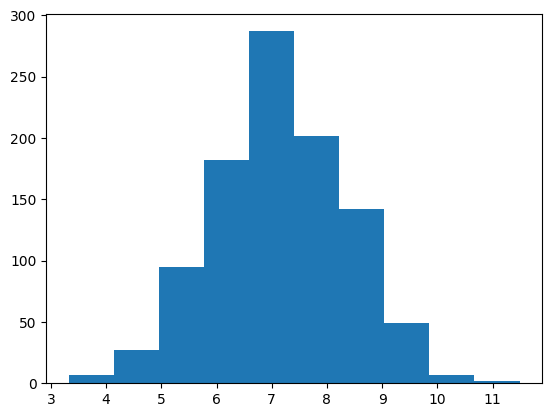

Skewness:  -0.028878575532660055

Kurtosis:  -0.019292120932933532

D'Agustino-Pearson Test
Test, p-value =  0.14329615661430725 ,  0.9308584274486692

Shapiro-Wilk Test
Test, p-value =  0.9990411400794983 ,  0.8935267925262451


In [32]:
# FIXED ACIDITY
normalityTests("fixed acidity")

#### Hasil Tes
- Berdasarkan histogram di atas, kolom "fixed acidity" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. *Skewness*-nya juga berada di antara -0.5 dan 0.5 (*skewness* = -0.0288, -0.5 < -0.0288 < 0.5), yang menandakan bahwa histogram di atas simetris. *Excess kurtosis*-nya juga berada di antara -0.5 dan 0.5 (*excess kurtosis* = -0.0192, -0.5 < -0.0192 < 0.5), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.
- Berdasarkan D'Agustino-Pearson Test, kolom "fixed acidity" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.9308 > 0.05).
- Berdasarkan Shapiro-Wilk Test, kolom "fixed acidity" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.8935 > 0.05).

#### Kesimpulan
Berdasarkan tes normalitas yang dilakukan di atas, kolom fixed acidity berdistribusi normal.

### 2. volatile acidity

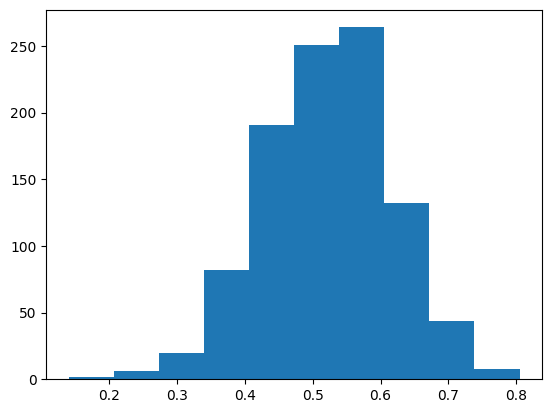

Skewness:  -0.1976986986092083

Kurtosis:  0.16185290336961788

D'Agustino-Pearson Test
Test, p-value =  7.581251985533493 ,  0.022581461594113835

Shapiro-Wilk Test
Test, p-value =  0.997028648853302 ,  0.05993043631315231


In [33]:
normalityTests("volatile acidity")

#### Hasil Tes
- Berdasarkan histogram di atas, kolom "volatile acidity" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. Walaupun begitu, sekilas histogramnya terlihat *negatively skewed*. *Skewness*-nya juga berada di antara -0.5 dan 0.5 (*skewness* = -0.1976, -0.5 < -0.1976 < 0.5), yang menandakan bahwa histogram di atas simetris. *Excess kurtosis*-nya juga berada di antara -0.5 dan 0.5 (*excess kurtosis* = 0.1618, -0.5 < 0.1618 < 0.5), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.
- Berdasarkan D'Agustino-Pearson Test, kolom "volatile acidity" tidak dapat dianggap berdistribusi normal karena Nilai P-nya tidak lebih dari 0.05 (Nilai P = 0.0225 <= 0.05). 
- Berdasarkan Shapiro-Wilk Test, kolom "volatile acidity" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.0599 > 0.05).

Terdapat perbedaan hasil tes diantara D'Agustino-Pearson Test dan Shapiro-Wilk Test karena nilai P dianggap berada dalam perbatasan normalitas.

#### Kesimpulan
Berdasarkan tes normalitas yang dilakukan di atas, kolom fixed acidity tidak berdistribusi normal.

### 3. citric acid

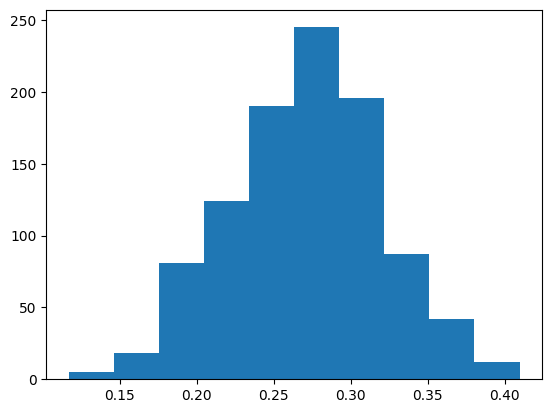

Skewness:  -0.045576058685017296

Kurtosis:  -0.1046792495951605

D'Agustino-Pearson Test
Test, p-value =  0.7663607229418252 ,  0.6816899375976969

Shapiro-Wilk Test
Test, p-value =  0.9979573488235474 ,  0.26522907614707947


In [34]:
normalityTests("citric acid")

#### Hasil Tes
- Berdasarkan histogram di atas, kolom "citric acid" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. *Skewness*-nya juga berada di antara -0.5 dan 0.5 (*skewness* = -0.0455, -0.5 < -0.0455 < 0.5), yang menandakan bahwa histogram di atas simetris. *Excess kurtosis*-nya juga berada di antara -0.5 dan 0.5 (*excess kurtosis* = -0.1046, -0.5 < -0.1046 < 0.5), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.
- Berdasarkan D'Agustino-Pearson Test, kolom "citric acid" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.6816 > 0.05).
- Berdasarkan Shapiro-Wilk Test, kolom "citric acid" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.2652 > 0.05).

#### Kesimpulan
Berdasarkan tes normalitas yang dilakukan di atas, kolom citric acid berdistribusi normal.

### 4. residual sugar

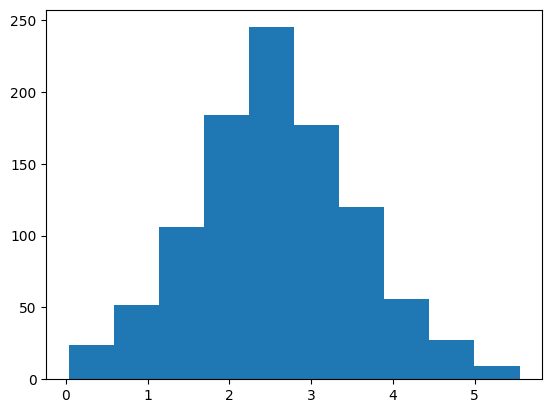

Skewness:  0.13263808618992312

Kurtosis:  -0.04298003436476261

D'Agustino-Pearson Test
Test, p-value =  2.9862716504538622 ,  0.22466703321310558

Shapiro-Wilk Test
Test, p-value =  0.9968547224998474 ,  0.044918645173311234


In [35]:
normalityTests("residual sugar")

#### Hasil Tes
- Berdasarkan histogram di atas, kolom "residual sugar" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. *Skewness*-nya juga berada di antara -0.5 dan 0.5 (*skewness* = 0.1326, -0.5 < 0.1326 < 0.5), yang menandakan bahwa histogram di atas simetris. *Excess kurtosis*-nya juga berada di antara -0.5 dan 0.5 (*excess kurtosis* = -0.0429, -0.5 < -0.0429 < 0.5), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.
- Berdasarkan D'Agustino-Pearson Test, kolom "residual sugar" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.2246 > 0.05).
- Berdasarkan Shapiro-Wilk Test, kolom "residual sugar" tidak dapat dianggap berdistribusi normal karena Nilai P-nya tidak lebih dari 0.05 (Nilai P = 0.0449 <= 0.05).

Terdapat perbedaan hasil tes diantara D'Agustino-Pearson Test dan Shapiro-Wilk Test karena nilai P dianggap berada dalam perbatasan normalitas.


#### Kesimpulan
Berdasarkan tes normalitas yang dilakukan di atas, kolom residual sugar berdistribusi normal.

### 5. chlorides

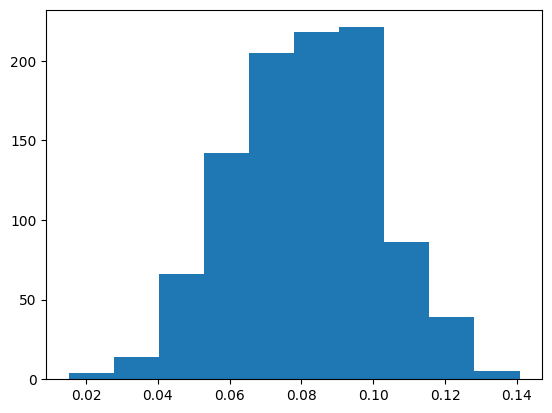

Skewness:  -0.05131929742072573

Kurtosis:  -0.2465081359240382

D'Agustino-Pearson Test
Test, p-value =  3.538242355484952 ,  0.17048274704296862

Shapiro-Wilk Test
Test, p-value =  0.9976862072944641 ,  0.17465530335903168


In [36]:
normalityTests("chlorides")

#### Hasil Tes
- Berdasarkan histogram di atas, kolom "chlorides" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. *Skewness*-nya juga berada di antara -0.5 dan 0.5 (*skewness* = -0.0513, -0.5 < -0.0513 < 0.5), yang menandakan bahwa histogram di atas simetris. *Excess kurtosis*-nya juga berada di antara -0.5 dan 0.5 (*excess kurtosis* = -0.2465, -0.5 < -0.2465 < 0.5), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.
- Berdasarkan D'Agustino-Pearson Test, kolom "chlorides" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.1704 > 0.05).
- Berdasarkan Shapiro-Wilk Test, kolom "chlorides" dapat dianggap berdistribusi normal karena Nilai P-nya lebih dari 0.05 (Nilai P = 0.1746 > 0.05).

#### Kesimpulan
Berdasarkan tes normalitas yang dilakukan di atas, kolom chlorides (tidak) berdistribusi normal.

### 6. free sulfur dioxide

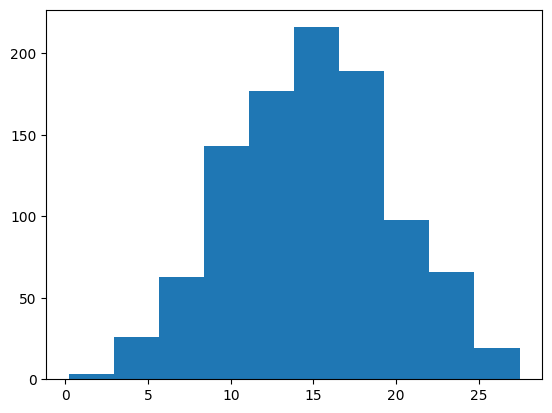

Skewness:  0.007130415991143398

Kurtosis:  -0.36496364342685306

D'Agustino-Pearson Test
Test, p-value =  8.099074980855514 ,  0.01743043451827735

Shapiro-Wilk Test
Test, p-value =  0.9968221783638 ,  0.04255827143788338


In [37]:
normalityTests("free sulfur dioxide")

#### Hasil Tes
- Berdasarkan histogram di atas, kolom "free sulfur dioxide" dapat dianggap berdistribusi normal karena histogramnya berbentuk *bell-shaped* yang simetris. *Skewness*-nya juga berada di antara -0.5 dan 0.5 (*skewness* = 0.0071, -0.5 < 0.0071 < 0.5), yang menandakan bahwa histogram di atas simetris. *Excess kurtosis*-nya juga berada di antara -0.5 dan 0.5 (*excess kurtosis* = -0.3649, -0.5 < -0.3649 < 0.5), yang menandakan bahwa histogram di atas memiliki keruncingan distribusi normal.
- Berdasarkan D'Agustino-Pearson Test, kolom "free sulfur dioxide" tidak dapat dianggap berdistribusi normal karena Nilai P-nya tidak lebih dari 0.05 (Nilai P = 0.0174 <= 0.05).
- Berdasarkan Shapiro-Wilk Test, kolom "free sulfur dioxide" tidak dapat dianggap berdistribusi normal karena Nilai P-nya tidak lebih dari 0.05 (Nilai P = 0.0425 <= 0.05).

#### Kesimpulan
Berdasarkan tes normalitas yang dilakukan di atas, kolom free sulfur dioxide tidak berdistribusi normal.

### 7. total sulfur dioxide

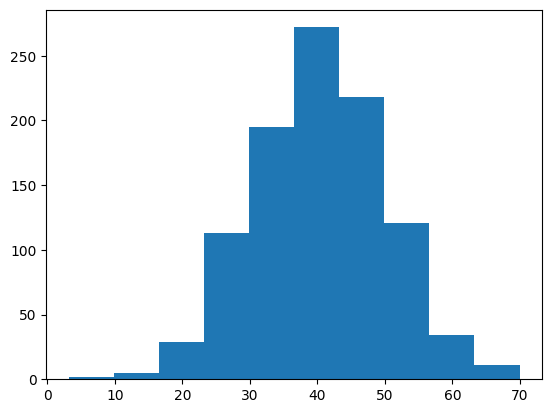

Skewness:  -0.024060026812269975

Kurtosis:  0.06394978916172311

D'Agustino-Pearson Test
Test, p-value =  0.3276640291639825 ,  0.8488846101395726

Shapiro-Wilk Test
Test, p-value =  0.9984723925590515 ,  0.5367269515991211


In [38]:
normalityTests("total sulfur dioxide")

Berdasarkan tes normalitas yang dilakukan di atas, kolom total sulfur dioxide berdistribusi normal karena memiliki nilai *skewness* sebesar -0.02. Hal ini juga tercermin pada plot histogram yang memiliki bentuk *bell-shaped*.

### 8. density

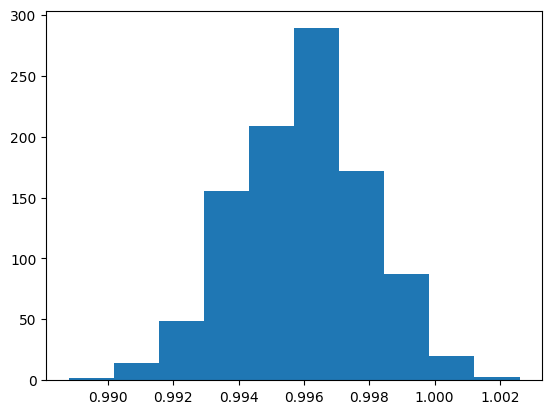

Skewness:  -0.07688278915513917

Kurtosis:  0.01636562128503849

D'Agustino-Pearson Test
Test, p-value =  1.026581544320803 ,  0.5985227325531981

Shapiro-Wilk Test
Test, p-value =  0.9989627003669739 ,  0.8533204793930054


In [39]:
normalityTests("density")

Berdasarkan tes normalitas yang dilakukan di atas, kolom fixed density (tidak) berdistribusi normal karena ...

### 9. pH

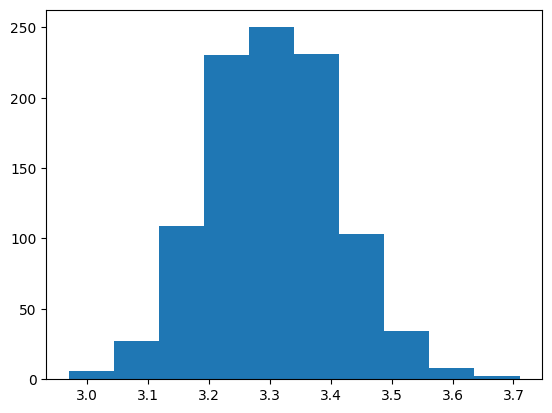

Skewness:  0.14767259510827038

Kurtosis:  0.0809095518741838

D'Agustino-Pearson Test
Test, p-value =  3.9786546459928545 ,  0.13678740824860436

Shapiro-Wilk Test
Test, p-value =  0.997534453868866 ,  0.13713516294956207


In [40]:
normalityTests("pH")

Berdasarkan tes normalitas yang dilakukan di atas, kolom pH (tidak) berdistribusi normal karena ...

### 10. sulphates

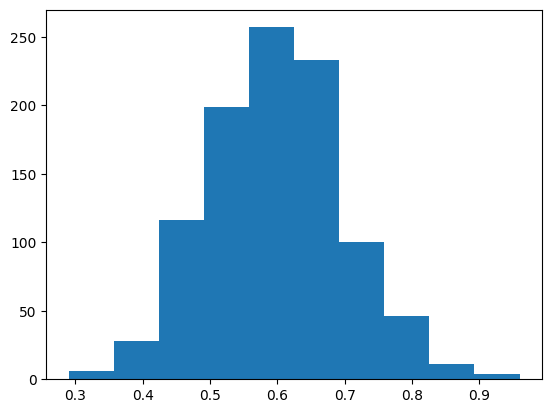

Skewness:  0.1491989008699043

Kurtosis:  0.06481928180859686

D'Agustino-Pearson Test
Test, p-value =  3.948820277859041 ,  0.13884318628391681

Shapiro-Wilk Test
Test, p-value =  0.997409999370575 ,  0.11214283108711243


In [41]:
normalityTests("sulphates")

Berdasarkan tes normalitas yang dilakukan di atas, kolom sulphates (tidak) berdistribusi normal karena ...

### 11. alcohol

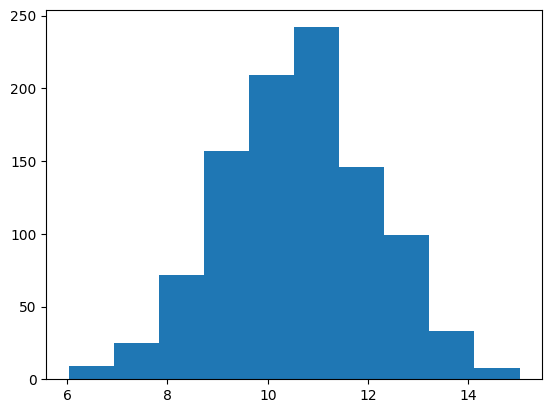

Skewness:  -0.01899140432111647

Kurtosis:  -0.13173155932281988

D'Agustino-Pearson Test
Test, p-value =  0.7740076714171271 ,  0.6790884901361043

Shapiro-Wilk Test
Test, p-value =  0.9984460473060608 ,  0.519870400428772


In [42]:
normalityTests("alcohol")

Berdasarkan tes normalitas yang dilakukan di atas, kolom alcohol (tidak) berdistribusi normal karena ...

### 12. quality

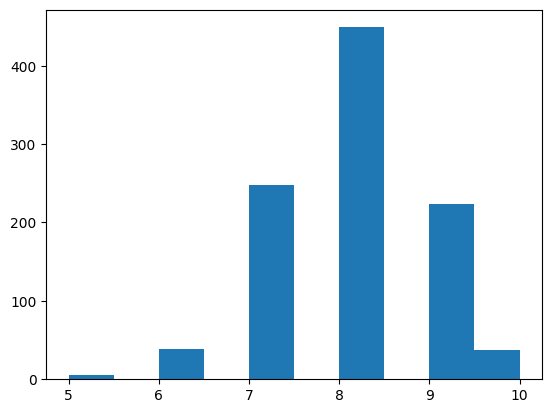

Skewness:  -0.08905409122491781

Kurtosis:  0.10829100232871003

D'Agustino-Pearson Test
Test, p-value =  1.8893087092494893 ,  0.3888139394184818

Shapiro-Wilk Test
Test, p-value =  0.895503044128418 ,  1.6663848458082077e-25


In [43]:
normalityTests("quality")

Berdasarkan tes normalitas yang dilakukan di atas, kolom quality (tidak) berdistribusi normal karena ...